integral de  0.0 à 4.71238898038469 total -0.9948685571761535 

le temps de l'execution 0.0019473670000000887


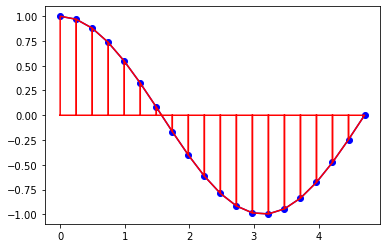

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  9 15:10:56 2020

@author: ourhzif abderrahim
"""

import numpy as np
import matplotlib.pyplot as plt
from mpi4py import MPI
import time

COMM=MPI.COMM_WORLD
p=COMM.Get_size()
Rank=COMM.Get_rank()
tag=99


def compute_integrale_trapeze(x, y, nbi):

    integrale = 0.
    for i in range(nbi):
        trap = (x[i+1]-x[i])/2 * (y[i]+y[i+1])
        integrale = integrale + trap
                
    return integrale

def plot_integrale(x, y, nbi):
    for i in range(nbi):
        # dessin du rectangle
        x_trap = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
        y_trap = [0   , y[i], y[i+1],      0,        0   ] # ordonnees des sommets
        plt.plot(x_trap, y_trap,"r")
    
    return 0
startime = time.process_time()    
xmin = 0
xmax = 3*np.pi/2
nbx = 20
nbi = nbx - 1 # nombre d'intervalles
dx = (xmax-xmin)/nbi
nbr = int((nbi)/p) 
if p==(Rank+1):   
    nbr=nbr+(nbi)%p
    xmin = xmin+(p-1)*nbr*dx
    xmax = 3*np.pi/2 
else:
    
    xmin =xmin+Rank*nbr*dx
    xmax =xmin+nbr*dx
x = np.linspace(xmin, xmax, nbr+1)
y = np.cos(x)
integral=compute_integrale_trapeze(x,y,nbr)

if (Rank==0):
    total=integral
    for i in range(1,p):
        integral=COMM.recv(source=i,tag=tag)
        total=total+integral
    print("integral de ",xmin,"à",xmax,"total",total,"\n")
    
else :
    COMM.send(integral,dest=0,tag=tag)

endtime= time.process_time()
print("le temps de l'execution",endtime-startime)
plt.plot(x,y,"bo-")
plot_integrale(x, y, nbr)   
    


plt.show()